## Imports and read images

In [1]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import time

In [2]:
images = []
for img_name in os.listdir("Задание 5"):
    images.append(cv.imread("Задание 5/" + img_name))

## Compute keypoints and descriptions

In [4]:
harris = []
sift = []
brisk = []

harris_mean_time = 0
sift_mean_time = 0
brisk_mean_time = 0

for image in images:
    start = time.time()
    harris_desription = cv.dilate(cv.cornerHarris(np.float32(cv.cvtColor(image, cv.COLOR_BGR2GRAY)), 2, 3, 0.01), None)
    harris_keypoints = (harris_desription > 0.01 * harris_desription.max()).nonzero()
    harris_mean_time += (time.time() - start) / len(harris_keypoints[0])
    harris.append(np.transpose(harris_desription[harris_keypoints]))
    
    start = time.time()
    sift_keypoints, sift_description = cv.SIFT_create().detectAndCompute(image, None)
    sift_mean_time += (time.time() - start) / len(sift_keypoints)
    sift.append(sift_description)
    
    start = time.time()
    brisk_keypoints, brisk_description = cv.BRISK_create().detectAndCompute(image, None)
    brisk_mean_time += (time.time() - start) / len(brisk_keypoints)
    brisk.append(brisk_description)

print("Harris spend", harris_mean_time / len(images), "seconds on point;")
print("SIFT spend", sift_mean_time / len(images), "seconds on point;")
print("BRISK spend", brisk_mean_time / len(images), "seconds on point;")

Harris spend 1.9007565669597914e-07 seconds on point;
SIFT spend 3.53738932296424e-05 seconds on point;
BRISK spend 4.586535553928187e-05 seconds on point;


## Compute repeatability function

In [5]:
def compute_repeatabilities(desriptions, norm):   
    bf = cv.BFMatcher(norm, crossCheck=True)
    repeatabilities = []
    for i, desriptions1 in enumerate(desriptions):
        repeats = np.zeros(len(desriptions1))
        for j, desriptions2 in enumerate(desriptions):
            if i != j:
                matched_points = bf.match(desriptions1, desriptions2)
                for point in matched_points:
                    repeats[point.queryIdx] += 1
        repeatabilities.append(np.mean((repeats / len(desriptions))))
    return repeatabilities

## Graph repeatability of different methods

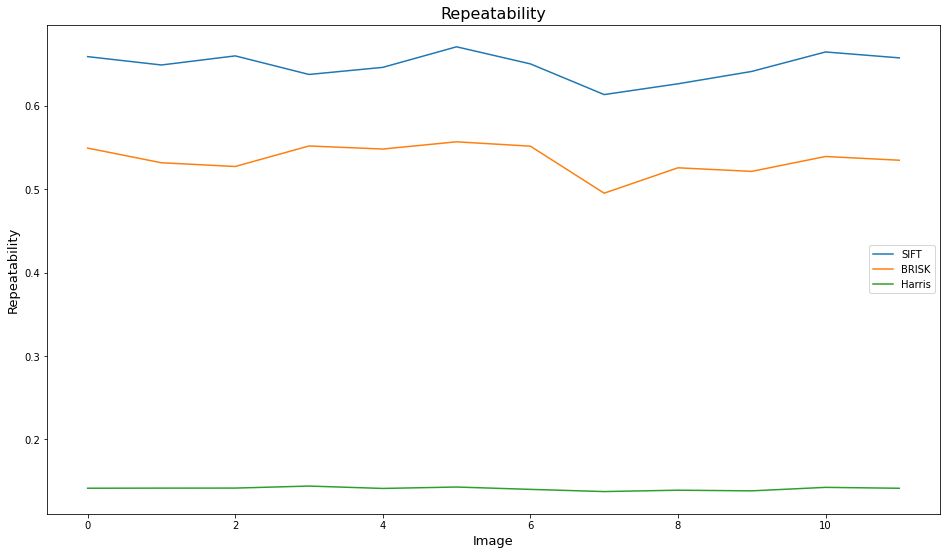

In [6]:
plt.figure(figsize=(16, 9))

plt.plot(compute_repeatabilities(sift, cv.NORM_L2), label='SIFT')
plt.plot(compute_repeatabilities(brisk, cv.NORM_HAMMING), label='BRISK')
plt.plot(compute_repeatabilities(harris, cv.NORM_L2), label='Harris')

plt.title('Repeatability', fontsize = 16)
plt.xlabel("Image", fontsize = 13)
plt.ylabel("Repeatability", fontsize = 13)
plt.legend()

plt.show()

## Result
The best of available methods is SIFT with the highest rate of repeatability. The fastest is Harris method, but it has low repeatability.